In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df=pd.read_csv("HR_comma_sep.csv")              
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [106]:
df.shape

(14999, 10)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [110]:
# 1. Check for Null and Missing Values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [112]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [114]:
df.duplicated().sum()

3008

In [116]:


# Load and preprocess the data
# We are starting with a clean slate here to ensure the code is runnable
df = pd.read_csv('HR_comma_sep.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["salary"] = le.fit_transform(df["salary"])
df = pd.get_dummies(df, columns=["Department"], drop_first=True)

# Remove all duplicate rows, keeping only the first occurrence
df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print("Number of duplicates after removal:", df.duplicated().sum())
print("New shape of DataFrame:", df.shape)

Number of duplicates after removal: 0
New shape of DataFrame: (11991, 18)


In [118]:
# Check skewness of numerical features #Positive = Right skewed; #Negative = Left skewed

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numerical_cols].skew().sort_values(ascending=False)
print("Skewness:\n", skewness)


Skewness:
 promotion_last_5years    7.490008
Work_accident            1.914410
time_spend_company       1.816577
left                     1.795135
number_project           0.332152
average_montly_hours     0.027208
last_evaluation         -0.031686
satisfaction_level      -0.538702
dtype: float64


In [120]:
# Describe to check mean, std, min, and max
description = df[numerical_cols].describe().T[['mean', 'std', 'min', 'max']]
print("Data summary:\n", description)

Data summary:
                              mean        std    min    max
satisfaction_level       0.629658   0.241070   0.09    1.0
last_evaluation          0.716683   0.168343   0.36    1.0
number_project           3.802852   1.163238   2.00    7.0
average_montly_hours   200.473522  48.727813  96.00  310.0
time_spend_company       3.364857   1.330240   2.00   10.0
Work_accident            0.154282   0.361234   0.00    1.0
left                     0.166041   0.372133   0.00    1.0
promotion_last_5years    0.016929   0.129012   0.00    1.0


In [156]:

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# IQR method
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers_iqr = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

# Count of outliers per column
print("Outliers per column (IQR method):")
print(outliers_iqr.sum())

# Total number of outlier rows
total_outliers = outliers_iqr.any(axis=1).sum()
print("\nTotal number of rows with outliers:", total_outliers)


Outliers per column (IQR method):
satisfaction_level          0
last_evaluation             0
number_project              0
average_montly_hours        0
time_spend_company       1282
Work_accident            2169
left                     3571
promotion_last_5years     319
salary                      0
dtype: int64

Total number of rows with outliers: 6595


In [126]:
# Cap outliers using IQR method
for col in numeric_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower, lower,
              np.where(df[col] > upper, upper, df[col]))


In [128]:

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Re-check outliers after capping
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

outliers_after = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

print("Outliers per column after capping (IQR method):")
print(outliers_after.sum())

print("\nTotal rows with outliers after capping:", outliers_after.any(axis=1).sum())


Outliers per column after capping (IQR method):
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dtype: int64

Total rows with outliers after capping: 0


In [132]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#  Start with a fresh DataFrame by reloading the CSV
df = pd.read_csv('HR_comma_sep.csv')

# Label encode 'salary'
le = LabelEncoder()
df["salary"] = le.fit_transform(df["salary"])

#  One-hot encode 'Department'
df = pd.get_dummies(df, columns=["Department"], drop_first=True)


In [134]:
#Define features (X) and target (y)
X = df.drop('left', axis=1)
y = df['left']



In [136]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [138]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

--- Logistic Regression ---
Accuracy: 0.7593333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



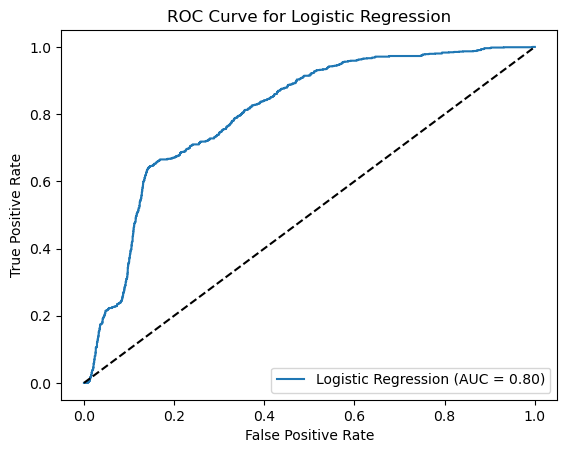

In [140]:

# 1. Logistic Regression Model
print("--- Logistic Regression ---")
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))



# After you train and predict with the model
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


--- Decision Tree ---
Accuracy: 0.9755555555555555
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3428
           1       0.94      0.96      0.95      1072

    accuracy                           0.98      4500
   macro avg       0.96      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



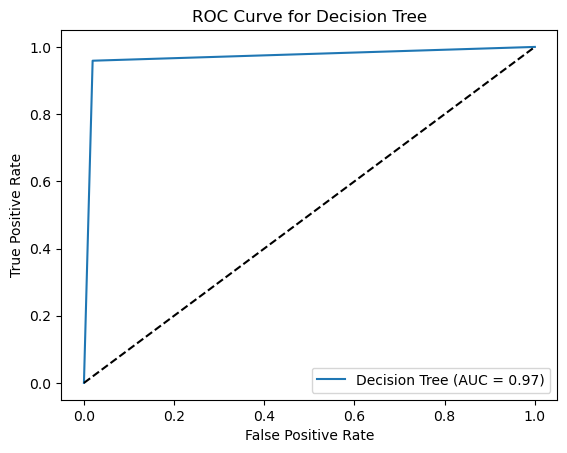

In [142]:
# 2. Decision Tree Model
print("\n--- Decision Tree ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))



# After you train and predict with the model
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()



--- Random Forest ---
Accuracy: 0.9866666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.95      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



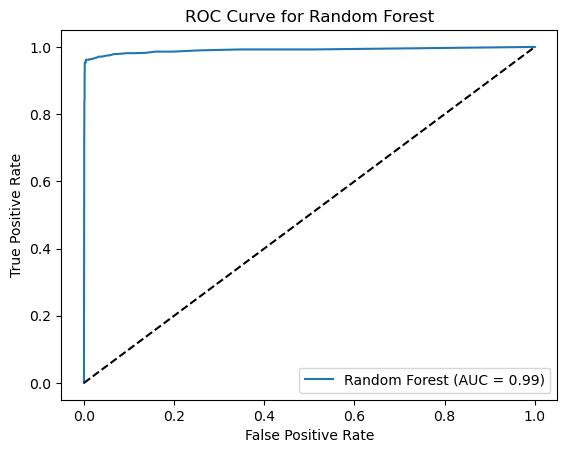

In [144]:
# 3. Random Forest Model
print("\n--- Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



# After you train and predict with the model
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()


--- Gradient Boosting ---
Accuracy: 0.9717777777777777
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3428
           1       0.96      0.92      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



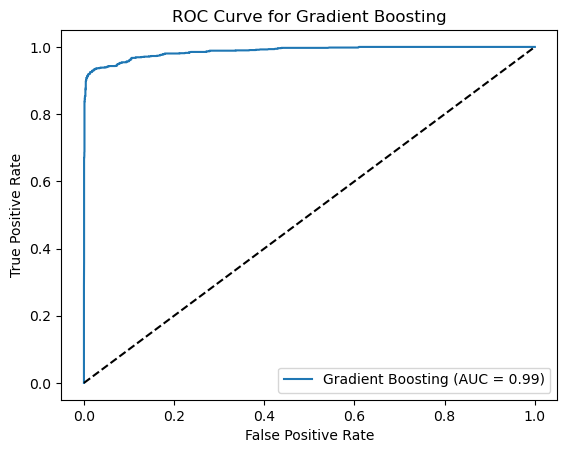

In [146]:
# 4. Gradient Boosting Model
print("\n--- Gradient Boosting ---")
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))



# After you train and predict with the model
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()



--- Support Vector Machine (SVC) ---
Accuracy: 0.7806666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      3428
           1       1.00      0.08      0.15      1072

    accuracy                           0.78      4500
   macro avg       0.89      0.54      0.51      4500
weighted avg       0.83      0.78      0.70      4500



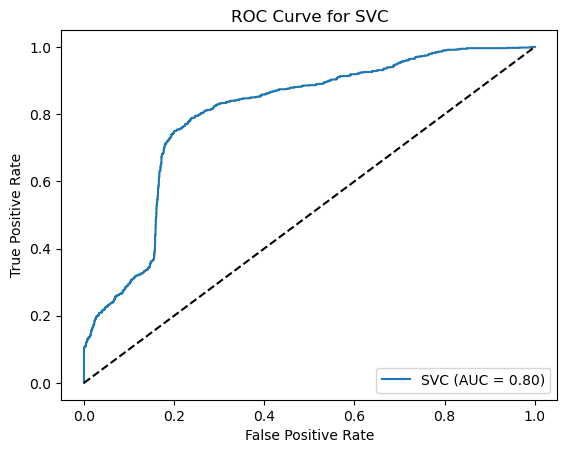

In [148]:
# 5. Support Vector Machine (SVC)
# Note: SVC can be slower on larger datasets
print("\n--- Support Vector Machine (SVC) ---")
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))



# from sklearn.svm import SVC

# Initialize the SVC model with probability=True
svc_model = SVC(probability=True, random_state=42)
svc_model.fit(X_train, y_train)

# After you train and predict with the model
y_pred_proba = svc_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'SVC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.legend(loc='lower right')
plt.show()

--- K-Nearest Neighbors ---
Accuracy: 0.9335555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      3428
           1       0.83      0.91      0.87      1072

    accuracy                           0.93      4500
   macro avg       0.90      0.93      0.91      4500
weighted avg       0.94      0.93      0.93      4500



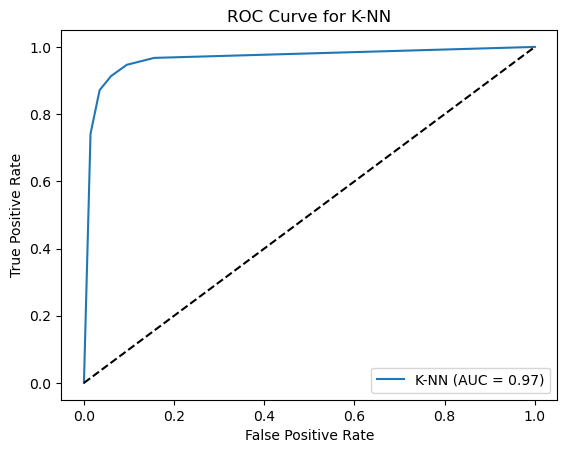

In [150]:
# 1. K-Nearest Neighbors (K-NN)
print("--- K-Nearest Neighbors ---")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))



# After you train and predict with the model
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'K-NN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.show()


--- Gaussian Naive Bayes ---
Accuracy: 0.7253333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      3428
           1       0.45      0.76      0.57      1072

    accuracy                           0.73      4500
   macro avg       0.68      0.74      0.68      4500
weighted avg       0.80      0.73      0.74      4500



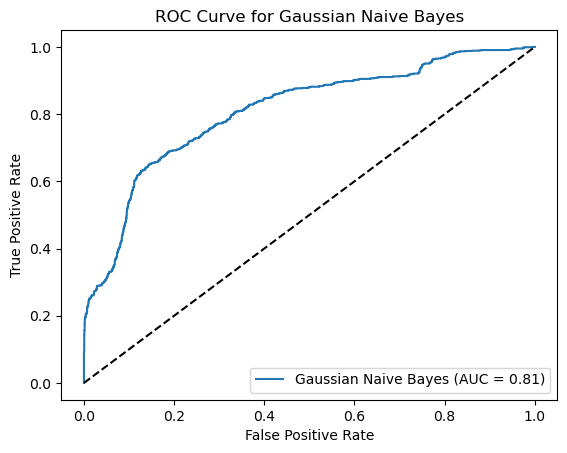

In [152]:
# 2. Gaussian Naive Bayes
print("\n--- Gaussian Naive Bayes ---")
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))



# After you train and predict with the model
y_pred_proba = gnb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Gaussian Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()


--- XGBoost Classifier ---
Accuracy: 0.9835555555555555
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3428
           1       0.98      0.95      0.97      1072

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



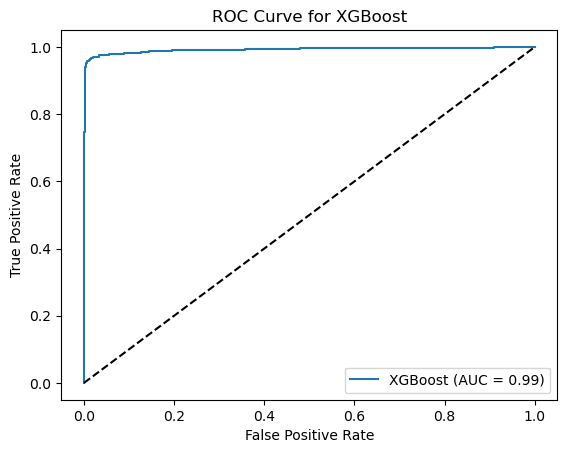

In [154]:
# 3. XGBoost Classifier
print("\n--- XGBoost Classifier ---")
# Removed the `use_label_encoder` parameter
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42) 
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))



# After you train and predict with the model
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()